In [4]:
import numpy as np
import matplotlib.pylab as plt

# 퍼셉트론 (간단한 논리 회로)

In [6]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.3
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1    
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

# 신경망

## 활성화 함수

In [7]:
def step_function(x):
    return np.array(x > 0, dtype=np.int32)

(-0.1, 1.1)

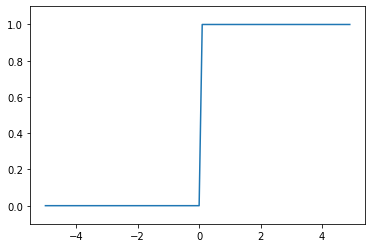

In [12]:
X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)

plt.plot(X, Y)
plt.ylim(-0.1, 1.1)

* 시그모이드 함수

In [17]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

(-0.1, 1.1)

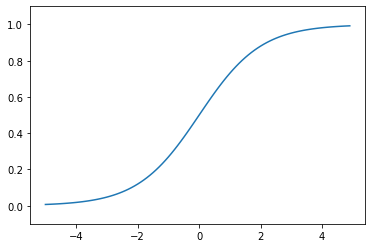

In [18]:
X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)

plt.plot(X, Y)
plt.ylim(-0.1, 1.1)

0과 1만 나오는 것이 아닌 0과 1사이를 부드럽게 출력해서  자연스럽다. 계단함수는 0에서 1이 갑작스레 바뀌는데 시그모이드는 그렇지 않고 중간 중간 실수를 출력한다.

# 비선형 함수

## ReLU 함수 

In [22]:
def relu(x):
    return np.maximum(0, x) #최소 0이다. 0이하는 0으로 표시.

(-1.1, 5.5)

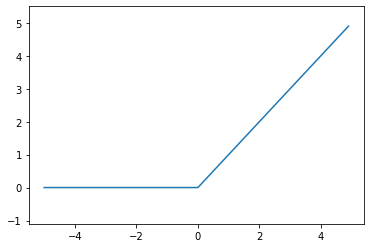

In [24]:
X = np.arange(-5.0, 5.0, 0.1)
Y = relu(X)

plt.plot(X, Y)
plt.ylim(-1.1, 5.5)

## 다차원 배열 계산

### 신경망에서의 행렬곱

In [26]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

In [32]:
A, B # 1 * 5 + 2 * 7  행렬연산 가로와 세로를 계산

(array([[1, 2],
        [3, 4]]),
 array([[5, 6],
        [7, 8]]))

In [30]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [37]:
A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
C = np.dot(A, B)
print(A.shape, B.shape, C.shape)

print(C)

(3, 2) (2, 4) (3, 4)
[[11 14 17 20]
 [23 30 37 44]
 [35 46 57 68]]


In [38]:
A=np.array([[1, 2],[3, 4],[5, 6]])
B=np.array([1, 2])
C=np.dot(A, B)
print(A.shape, B.shape, C.shape)

print(C)

(3, 2) (2,) (3,)
[ 5 11 17]


In [47]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
Y = np.dot(X, W)

In [49]:
X, W, Y # (2), (2, 3), (3,)

(array([1, 2]),
 array([[1, 3, 5],
        [2, 4, 6]]),
 array([ 5, 11, 17]))

In [50]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B = np.array([0.1, 0.2, 0.3])

In [68]:
A1 = X@W1 + B

In [69]:
A1.shape , A1

((3,), array([0.3, 0.7, 1.1]))

In [70]:
Z1 = sigmoid(A1)

In [71]:
Z1

array([0.57444252, 0.66818777, 0.75026011])

In [72]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

In [79]:
A2 = Z1@W2 + B2
Z2 = sigmoid(A2)

In [80]:
A2

array([0.51615984, 1.21402696])

In [81]:
Z2

array([0.62624937, 0.7710107 ])

In [82]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]]) # W3.shape에서 앞에올 것은 입력개수, 뒤에 올 것은 출력 개수이다.
B3 = np.array([0.1, 0.2])

In [89]:
def identity_function(x):
    return x
A3 = Z2@W3 + B3
Z3 = identity_function(A3) #이전의 식처럼 함수에 보내주기 위해 항등함수를 쓰는데 자기 자신을 반환하기에 굳이 안써도 된다. 
# 출력해야할 값에 따라서 쓰기도 한다.

In [90]:
Z3

array([0.31682708, 0.69627909])

#### 3층 신경망 구현

In [99]:
def identity_function(x):
    return x
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['B1'] = np.array([0.1, 0.2, 0.3])
    network['B2'] = np.array([0.1, 0.2])
    network['B3'] = np.array([0.1, 0.2])
    return network

def forward(network, X):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['B1'], network['B2'], network['B3']
    A1 = X@W1 + B1
    Z1 = sigmoid(A1)


    A2 = Z1@W2 + B2
    Z2 = sigmoid(A2)


    A3 = Z2@W3 + B3
    Y = identity_function(A3)
    return Y

In [102]:
network = init_network()
X = np.array([1.0, 0.5])
Y = forward(network, X)

In [103]:
Y

array([0.31682708, 0.69627909])

In [110]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) #자연상수를 지수함수로 바꿔줌
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [111]:
a = np.array([0.3, 2.9, 4.0])

In [112]:
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

# 손글씨 숫자 (MNIST)

In [113]:
import pickle
from dataset.mnist import load_mnist

In [116]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False) #y_train이 아닌건 true train으로 해서그럼 
#normalize 는 0.0부터 1.0사이의 값으로 정규화를 할 것인지, one_hot_label은 label에 대해 원핫인코딩을 하여7번째의 label에 1이나오는 것 
    return x_test, t_test

In [233]:
def init_network():
    with open('sample_weight.pkl', 'rb') as f:
        network = pickle.load(f) #pickle안에는 딕셔너리처럼 가중치와 편향이 딕셔너리의 형태로 다 들어있다.
    return network

def predict (network, X):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['b1'], network['b2'], network['b3']
    A1 = X@W1 + B1
    Z1 = sigmoid(A1)


    A2 = Z1@W2 + B2
    Z2 = sigmoid(A2)


    A3 = Z2@W3 + B3
    Y = softmax(A3) # 값을 부드럽게 하려고
    return Y

In [234]:
x, t = get_data()

In [235]:
x.shape # 28 * 28 사이즈를 flatten 하여 784가 나왔다.

(10000, 784)

In [236]:
import matplotlib.pyplot as plt

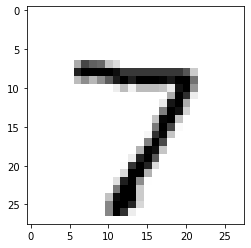

In [237]:
plt.imshow(x[0].reshape(28, 28), cmap='binary') # 784를 28, 28로 이미지 형식으로 바꾸어 시각화 함.

In [238]:
network = init_network()

In [239]:
network['W3'].shape #이런식으로 가중치가 다 들어있다. 784를 50개로 줄이고 다시 100으로 늘린다음 10으로 줄였다.

(100, 10)

In [240]:
print('W1 : ', network['W1'].shape)
print('W2 : ', network['W2'].shape)
print('W3 : ', network['W3'].shape)
print('b1 : ', network['b1'].shape)
print('b2 : ', network['b2'].shape)
print('b3 : ', network['b3'].shape)

W1 :  (784, 50)
W2 :  (50, 100)
W3 :  (100, 10)
b1 :  (50,)
b2 :  (100,)
b3 :  (10,)


In [241]:
accuracy_count = 0
for i in range(len(x)):
    y = predict(network, x[i]) #forward
    p = np.argmax(y) #max값의 인덱스 알려줌
    if p == t[i]:
        accuracy_count += 1
print('Accuracy : ', accuracy_count / len(t))

Accuracy :  0.9352


In [242]:
accuracy_count = 0
batch_size = 100

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch) #forward
    p = np.argmax(y_batch, axis=1) #max값의 인덱스 알려줌
    accuracy_count += (p == t[i:i+batch_size]).sum()
print('Accuracy : ', accuracy_count / len(t))

Accuracy :  0.9352
